In [1]:
from  IPython.display  import display, Image # Displays things nicely
import pandas as pd
from pandas_datareader import data, wb # This will import the data reader
import weightedcalcs as wc
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
from scipy.interpolate import griddata

fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\tradeexposure\\figures"

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas_datareader

You should consider upgrading via the 'c:\Users\mcket\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 109.5/109.5 KB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 20.8 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 KB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 KB 3.2 MB/s eta 0:00:00
     -------------------------------------- 155.3/155.3 KB 9.7 MB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 KB 8.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\mcket\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
column_names = ["tax", "tariff", "tau", "trade_volume", "ls", "migration", "output", "OPterm2", "welfare", "exitflag", "welfare_smth"]

values = ["0.05","0.1", "0.2", "0.3", "0.4"]

In [260]:
    mat = loadmat("tariff_results0.4") 
    
    df = pd.DataFrame(mat["results"])
    
    df.columns = column_names
    
    df.dtypes
    
    df[df.tax == 0.0]
    
df.tax.unique()

array([-0.2 , -0.1 ,  0.  ,  0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,
        0.32,  0.45])

In [261]:
baseline = float(df[(round(df.tax,2) == 0.20) & (df.tariff == 0.00)].welfare_smth)

baseline

-23.347438382824915

In [262]:
df["ce_gains"] =100*(np.exp((1-0.95)*(df.welfare_smth - baseline))-1)

df.tail(10)

,tax,tariff,tau,trade_volume,ls,migration,output,OPterm2,welfare,exitflag,welfare_smth,ce_gains
67,0.32,0.20,1.584615,0.373586,0.660324,0.037346,1.053347,0.208474,-24.742859,0.0,-24.740396,-6.727781
68,0.32,0.25,1.584615,0.372654,0.660792,0.035918,1.034896,0.196978,-25.056241,0.0,-25.043890,-8.132472
69,0.32,0.30,1.584615,0.375952,0.660208,0.034899,1.019193,0.188536,-25.315535,0.0,-25.322069,-9.401411
70,0.45,0.00,1.584615,0.388080,0.659229,0.040888,1.134225,0.252071,-23.097820,0.0,-23.113711,1.175491
71,0.45,0.05,1.584615,0.378339,0.659820,0.038691,1.105484,0.234454,-23.589150,0.0,-23.595796,-1.234109
72,0.45,0.10,1.584615,0.372845,0.658790,0.036918,1.079255,0.220065,-24.007006,0.0,-24.026975,-3.340612
73,0.45,0.15,1.584615,0.368185,0.661418,0.035228,1.059708,0.206697,-24.411223,0.0,-24.412340,-5.185240
74,0.45,0.20,1.584615,0.365733,0.660957,0.033865,1.040619,0.196231,-24.739547,0.0,-24.756981,-6.805094
75,0.45,0.25,1.584615,0.362435,0.663791,0.032490,1.025997,0.185331,-25.066889,0.0,-25.065988,-8.233920
76,0.45,0.30,1.584615,0.365626,0.663052,0.031454,1.010074,0.177084,-25.335567,0.0,-25.344451,-9.502741


In [238]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

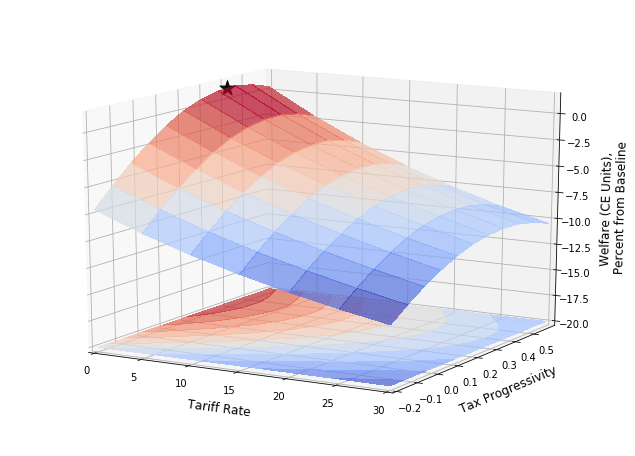

In [263]:
x, y, z = create_grid(df,"tariff","tax","ce_gains")

fig = plt.figure(figsize = (11,8))

ax = fig.gca(projection='3d')

ax.plot_surface(100*x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.70)

cemax = df["ce_gains"].idxmax()

ax.scatter3D(100*df["tariff"][cemax], df["tax"][cemax], df["ce_gains"][cemax],
             s = 250, color = "black", alpha = 0.95, marker = "*")

ofs = -20

ax.contourf(100*x, y, z, 10, offset=ofs,  cmap=cm.coolwarm, 
                  alpha = 0.70, linestyles = "dashed")


ax.set_xlim(0.0,30)
ax.set_ylim(-0.2,0.6)
ax.set_zlim3d(ofs,1.5)

ax.view_init(15,300)

ax.set_xlabel("\nTariff Rate", fontsize = 12)
ax.set_ylabel("\nTax Progressivity", fontsize = 12)
ax.set_zlabel("\n\nWelfare (CE Units),\n Percent from Baseline", fontsize = 12)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.savefig(fig_path + "\\tariff_high_trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()